## https://www.overleaf.com/6598716657yshrwydckmzz

In [ ]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


# # load the dataset
# (X_train, y_train), (X_test, y_test) = imdb.load_data()
# X = numpy.concatenate((X_train, X_test), axis=0)
# y = numpy.concatenate((y_train, y_test), axis=0)

# -------------------------------
# PARAMETERS
# -------------------------------
top_words = 5000
max_words = 500
batch_size = 128
num_epochs = 2

CNN = True
# -------------------------------

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# -------------------------------
# create the model
# -------------------------------

if (not CNN):
    # model uses logarithmic loss and is optimized using the efficient ADAM optimization procedure.
    model = Sequential()
    model.add(Embedding(top_words, 32, input_length=max_words))
    model.add(Flatten())
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
else:
    # CNN model
    model = Sequential()
    model.add(Embedding(top_words, 32, input_length=max_words))
    model.add(Conv1D(32, 3, padding='same', activation='relu'))
    model.add(MaxPooling1D())
    model.add(Flatten())
    model.add(Dense(250, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())

# -------------------------------
# fit the model
# -------------------------------

# There is a lot of data so we will use a batch size of 128. 
# After the model is trained, we evaluate its accuracy on the test dataset.
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=batch_size, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


def printDataInfo(X, y):
    # summarize size
    print("Training data: ")
    print(X.shape)
    print(y.shape)

    # Summarize number of classes
    print("Classes: ")
    print(numpy.unique(y))

    # Summarize number of words
    print("Number of words: ")
    print(len(numpy.unique(numpy.hstack(X))))

    # Summarize review length
    print("Review length: ")
    result = [len(x) for x in X]
    print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
    # plot review length
    pyplot.boxplot(result)
    pyplot.show()




Using TensorFlow backend.
17465344/17464789 [==============================] - 0s 0us/step
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Train

In [ ]:
!ls /datasets/gzdata


ls: cannot access '/datasets/gzdata'$'\r': No such file or directory


!pip install tensorflow


link to the data : http://ai.stanford.edu/~amaas/data/sentiment/

link to Machine Learning Mastery: https://machinelearningmastery.com/predict-sentiment-movie-reviews-using-deep-learning/

links to Keras website : https://keras.io/examples/imdb_lstm/

https://keras.io/examples/imdb_fasttext/

https://keras.io/examples/imdb_cnn_lstm/

https://keras.io/examples/imdb_cnn/



Text processing (for our datasets):
https://keras.io/preprocessing/text/

https://keras.io/layers/embeddings/#embedding

https://keras.io/layers/embeddings/

https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/


Web Scraping:

https://www.dataquest.io/blog/web-scraping-beautifulsoup/


Multi class classification :

https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/


How to use the embedding layer : 


https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/


New code for multi-class classification and also little snippet on how to test our model on a home made example


https://towardsdatascience.com/multi-class-text-classification-with-lstm-1590bee1bd17


Discussion on several techniques on multi-class classification (with theoretical explanations on each technique)

https://medium.com/datadriveninvestor/deep-learning-techniques-for-text-classification-9392ca9492c7

Same but for image classification (just to see the search methodology)

https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/



How to use the metrics (our tries on Angela_accuracy)

https://machinelearningmastery.com/custom-metrics-deep-learning-keras-python/


In [ ]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
print(X_train)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
print("embedded",X_train)
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 2, 134, 26, 

In [ ]:
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
39s - loss: 0.5160 - acc: 0.7040 - val_loss: 0.2982 - val_acc: 0.8716
Epoch 2/2
37s - loss: 0.1897 - acc: 0.9266 - val_loss: 0.3143 - val_acc: 0.8694
Accuracy: 86.94%

SyntaxError: invalid syntax (<ipython-input-12-b384103248ab>, line 1)

In [ ]:
!ls aclImdb/test/neg
/home/jovyan/work/aclImdb/test/neg


ls: cannot access 'aclImdb/test/neg'$'\r': No such file or directory


In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np


import numpy
from keras.datasets import imdb
from matplotlib import pyplot
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.layers import Flatten
#from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


# # load the dataset
# (X_train, y_train), (X_test, y_test) = imdb.load_data()
# X = numpy.concatenate((X_train, X_test), axis=0)
# y = numpy.concatenate((y_train, y_test), axis=0)

# -------------------------------
# PARAMETERS
# -------------------------------
top_words = 5000
max_words = 500
batch_size = 128
num_epochs = 2

CNN = True
# -------------------------------

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

data_dim = 16
timesteps = 8
num_classes = 10
batch_size = 32

# Expected input batch shape: (batch_size, timesteps, data_dim)
# Note that we have to provide the full batch_input_shape since the network is stateful.
# the sample of index i in batch k is the follow-up for the sample i in batch k-1.
model = Sequential()
keras.layers.SimpleRNN(units, activation='tanh', use_bias=True,kernel_initializer='glorot_uniform', recurrent_initializer='orthogonal', bias_initializer='zeros', kernel_regularizer=None, recurrent_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, recurrent_constraint=None, bias_constraint=None, dropout=0.0, recurrent_dropout=0.0, return_sequences=False, return_state=False, go_backwards=False, stateful=False, unroll=False)
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
              
""" 
# Generate dummy training data
x_train = np.random.random((batch_size * 10, timesteps, data_dim))
y_train = np.random.random((batch_size * 10, num_classes))

# Generate dummy validation data
x_val = np.random.random((batch_size * 3, timesteps, data_dim))
y_val = np.random.random((batch_size * 3, num_classes))
 """
model.fit(X_train, y_train, batch_size=batch_size, epochs=5, shuffle=False, validation_data=(X_test, y_test))
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


ValueError: Error when checking input: expected lstm_1_input to have 3 dimensions, but got array with shape (25000, 500)

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=1,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Using TensorFlow backend.
Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
/opt/venv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 236s 9ms/step - loss: 0.4591 - accuracy: 0.7814 - val_loss: 0.4082 - val_accuracy: 0.8146
Epoch 2/15
 2336/25000 [=>............................] - ETA: 2:45 - loss: 0.2869 - accuracy: 0.8955

KeyboardInterrupt: 

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
import os

for files in os.walk(home/jovyan/work/aclImdb/test/neg):
    for name in files:
        text_file = open(name, "r")
        lines = text_file.readlines()
        print(lines)

NameError: name 'home' is not defined

In [ ]:
from pathlib import Path 
import numpy as np
import os 
myDirectory="/home/jovyan/work/aclImdb/test/neg/" 
p = Path(myDirectory) 
corpus=[]
k=0
for x in os.listdir(p): 
    k+=1
    y=myDirectory +x
    text_file = open(y, "r")
    lines = text_file.readlines()
    #print(lines)
    if k == 5:
        break
    corpus.append(lines[0])
    #print(corpus)
print(corpus)


from keras.preprocessing.text import Tokenizer
Y=np.array([1,2,3,4])

# create the tokenizer
t = Tokenizer()
# fit the tokenizer on the documents
t.fit_on_texts(corpus)
# summarize what was learned
print(t.word_counts)
print(t.document_count)
print(t.word_index)
print(t.word_docs)
# integer encode documents
encoded_docs = t.texts_to_matrix(corpus, mode='count')
print(encoded_docs)

from sklearn.utils import shuffle
#X=[1,2,3]
#y = ['one', 'two', 'three']
encoded_docs, Y = shuffle(encoded_docs, Y, random_state=0)
print(encoded_docs)
print(Y)

['This is a title in search of a movie. It\'s a pitch that sounded lucrative to some studio executive and the rest be damned. When this film was made there were still two things that CGI did not do at all well: people, and fur. Furry people were thus not destined to look good when rendered by computer. This is the only example I can think of where effects for a well-funded sequel took a giant leap back landing well behind those of the original movie. For the record, the design of the werewolves doesn\'t help a bit. The film-makers apparently couldn\'t decide between quadruped and biped, tried to do both, and wound up with a creature that looks equally awkward either way. The transformations are anatomically nonsensical and the end result with a relatively high forehead and short snout looks like a cross between Ron Perlman and a hyena. But back to the crass part. This is a movie which exists PURELY to cash in on its forebear. I am not a fan of Landis\' original film but boy, does it lo

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print(y_train)

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)


Loading data...
25000 train sequences
25000 test sequences
[1 0 0 ... 0 1 0]
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)


In [ ]:
from pathlib import Path 
import numpy as np
import os 
kmax = 5000

trainDirneg="/home/jovyan/work/aclImdb/train/neg/" 
ptdn = Path(trainDirneg) 
trainx=[]
Ytrain=[]
k=0
for x in os.listdir(ptdn): 
    y=trainDirneg +x
    text_file = open(y, "r")
    lines = text_file.readlines()
    trainx.append(lines[0])
    Ytrain.append(0)
    k+=1
    if k == kmax:
        break



trainDirpos="/home/jovyan/work/aclImdb/train/pos/" 
ptdp = Path(trainDirpos) 
k=0
for x in os.listdir(ptdp): 
    y=trainDirpos +x
    text_file = open(y, "r")
    lines = text_file.readlines()
    trainx.append(lines[0])
    Ytrain.append(1)
    k+=1
    if k == kmax:
        break

k=0
testDirneg="/home/jovyan/work/aclImdb/test/neg/" 
ptedn = Path(testDirneg) 
testx=[]
Ytest=[]
for x in os.listdir(ptedn): 
    y=testDirneg +x
    text_file = open(y, "r")
    lines = text_file.readlines()
    #print(lines)
    testx.append(lines[0])
    Ytest.append(0)
    #print(corpus)
    k+=1
    if k == kmax:
        break

testDirpos="/home/jovyan/work/aclImdb/test/pos/" 
ptedp = Path(testDirpos) 
k=0
for x in os.listdir(ptedp): 
    y=testDirpos +x
    text_file = open(y, "r")
    lines = text_file.readlines()
    #print(lines)
    testx.append(lines[0])
    Ytest.append(1)
    #print(corpus)
    k+=1
    if k == kmax:
        break

"""
from keras.preprocessing.text import Tokenizer

# create the tokenizer
train = Tokenizer()
# fit the tokenizer on the documents
train.fit_on_texts(trainx)
# summarize what was learned
print(train.word_counts)
print(train.document_count)
print(train.word_index)
print(train.word_docs)
# integer encode documents
Xtrain = train.texts_to_matrix(trainx, mode='count')
print(Xtrain)



test = Tokenizer()
test.fit_on_texts(testx)
Xtest = test.texts_to_matrix(testx, mode='count')
print(Xtest)

from sklearn.utils import shuffle

Xtrain, Ytrain = shuffle(Xtrain, Ytrain, random_state=0)
Xtest, Ytest = shuffle(Xtest, Ytest, random_state=0)
print(Xtrain)
"""



"\nfrom keras.preprocessing.text import Tokenizer\n\n# create the tokenizer\ntrain = Tokenizer()\n# fit the tokenizer on the documents\ntrain.fit_on_texts(trainx)\n# summarize what was learned\nprint(train.word_counts)\nprint(train.document_count)\nprint(train.word_index)\nprint(train.word_docs)\n# integer encode documents\nXtrain = train.texts_to_matrix(trainx, mode='count')\nprint(Xtrain)\n\n\n\ntest = Tokenizer()\ntest.fit_on_texts(testx)\nXtest = test.texts_to_matrix(testx, mode='count')\nprint(Xtest)\n\nfrom sklearn.utils import shuffle\n\nXtrain, Ytrain = shuffle(Xtrain, Ytrain, random_state=0)\nXtest, Ytest = shuffle(Xtest, Ytest, random_state=0)\nprint(Xtrain)\n"

In [ ]:
from keras.preprocessing.text import Tokenizer

# create the tokenizer
train = Tokenizer()
# fit the tokenizer on the documents
train.fit_on_texts(trainx)
# summarize what was learned
print(train.word_counts)
print(train.document_count)
print(train.word_index)
print(train.word_docs)
# integer encode documents
Xtrain = train.texts_to_matrix(trainx, mode='count')




test = Tokenizer()
test.fit_on_texts(testx)
Xtest = test.texts_to_matrix(testx, mode='count')

#from sklearn.utils import shuffle

#Xtrain, Ytrain = shuffle(Xtrain, Ytrain, random_state=0)
#Xtest, Ytest = shuffle(Xtest, Ytest, random_state=0)



OrderedDict([("antonioni's", 7), ('movies', 3062), ('have', 10989), ('aged', 86), ('not', 12184), ('well', 4260), ('what', 6086), ('always', 1295), ('surprised', 325), ('me', 4323), ('about', 7001), ('them', 3171), ('is', 42525), ('that', 27531), ('besides', 163), ('an', 8500), ('unquestionable', 2), ('plastic', 63), ('beauty', 235), ('there', 6335), ('a', 64837), ('dull', 331), ('and', 65057), ('didactic', 6), ('psychology', 24), ('of', 57960), ('the', 132738), ('characters', 2787), ('situations', 199), ('remember', 683), ('for', 17694), ('instance', 106), ('conversations', 44), ('between', 1322), ('mastroianni', 18), ('wicked', 41), ('capitalistic', 3), ('wants', 529), ('sing', 119), ('up', 5278), ('him', 3437), ('in', 37066), ('la', 183), ('notte', 4), ('or', 7114), ('monica', 16), ('vitti', 3), ('laughing', 215), ('at', 9381), ('peasants', 5), ('flirting', 9), ('train', 159), ('aventura', 2), ('ferzetti', 1), ('dropping', 33), ('glass', 64), ('ink', 5), ('end', 2260), ('same', 1578

In [ ]:
print(len(Xtrain))
print(len(Xtest))

10000
10000


In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

"""
print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
"""

"""
################

REPLACING KERAS DATASET BY OURS

################
"""
x_train = Xtrain
y_train = Ytrain
x_test = Xtest
y_test = Ytest



print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

"""
################

BUILDING THE NETWORK

################
"""


print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


"""
################

TRAINING ON THE DATA

################
"""


print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=15,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

In [ ]:
from __future__ import print_function
import numpy as np

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import GlobalAveragePooling1D
from keras.datasets import imdb


def create_ngram_set(input_list, ngram_value=2):
    """
    Extract a set of n-grams from a list of integers.

    >>> create_ngram_set([1, 4, 9, 4, 1, 4], ngram_value=2)
    {(4, 9), (4, 1), (1, 4), (9, 4)}

    >>> create_ngram_set([1, 4, 9, 4, 1, 4], ngram_value=3)
    [(1, 4, 9), (4, 9, 4), (9, 4, 1), (4, 1, 4)]
    """
    return set(zip(*[input_list[i:] for i in range(ngram_value)]))


def add_ngram(sequences, token_indice, ngram_range=2):
    """
    Augment the input list of list (sequences) by appending n-grams values.

    Example: adding bi-gram
    >>> sequences = [[1, 3, 4, 5], [1, 3, 7, 9, 2]]
    >>> token_indice = {(1, 3): 1337, (9, 2): 42, (4, 5): 2017}
    >>> add_ngram(sequences, token_indice, ngram_range=2)
    [[1, 3, 4, 5, 1337, 2017], [1, 3, 7, 9, 2, 1337, 42]]

    Example: adding tri-gram
    >>> sequences = [[1, 3, 4, 5], [1, 3, 7, 9, 2]]
    >>> token_indice = {(1, 3): 1337, (9, 2): 42, (4, 5): 2017, (7, 9, 2): 2018}
    >>> add_ngram(sequences, token_indice, ngram_range=3)
    [[1, 3, 4, 5, 1337, 2017], [1, 3, 7, 9, 2, 1337, 42, 2018]]
    """
    new_sequences = []
    for input_list in sequences:
        new_list = input_list[:]
        for ngram_value in range(2, ngram_range + 1):
            for i in range(len(new_list) - ngram_value + 1):
                ngram = tuple(new_list[i:i + ngram_value])
                if ngram in token_indice:
                    new_list.append(token_indice[ngram])
        new_sequences.append(new_list)

    return new_sequences

# Set parameters:
# ngram_range = 2 will add bi-grams features
ngram_range = 1
max_features = 20000
maxlen = 400
batch_size = 32
embedding_dims = 50
epochs = 5

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print('Average train sequence length: {}'.format(
    np.mean(list(map(len, x_train)), dtype=int)))
print('Average test sequence length: {}'.format(
    np.mean(list(map(len, x_test)), dtype=int)))

if ngram_range > 1:
    print('Adding {}-gram features'.format(ngram_range))
    # Create set of unique n-gram from the training set.
    ngram_set = set()
    for input_list in x_train:
        for i in range(2, ngram_range + 1):
            set_of_ngram = create_ngram_set(input_list, ngram_value=i)
            ngram_set.update(set_of_ngram)
            

    # Dictionary mapping n-gram token to a unique integer.
    # Integer values are greater than max_features in order
    # to avoid collision with existing features.
    start_index = max_features + 1
    token_indice = {v: k + start_index for k, v in enumerate(ngram_set)}
    indice_token = {token_indice[k]: k for k in token_indice}

    # max_features is the highest integer that could be found in the dataset.
    max_features = np.max(list(indice_token.keys())) + 1

    # Augmenting x_train and x_test with n-grams features
    x_train = add_ngram(x_train, token_indice, ngram_range)
    x_test = add_ngram(x_test, token_indice, ngram_range)
    print('Average train sequence length: {}'.format(
        np.mean(list(map(len, x_train)), dtype=int)))
    print('Average test sequence length: {}'.format(
        np.mean(list(map(len, x_test)), dtype=int)))

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))

# we add a GlobalAveragePooling1D, which will average the embeddings
# of all words in the document
model.add(GlobalAveragePooling1D())

# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))

Using TensorFlow backend.
Loading data...
17465344/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Average train sequence length: 238
Average test sequence length: 230
Pad sequences (samples x time)
x_train shape: (25000, 400)
x_test shape: (25000, 400)
Build model...
/opt/venv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 22s 899us/step - loss: 0.6133 - accuracy: 0.7392 - val_loss: 0.5063 - val_accuracy: 0.8236
Epoch 2/5
25000/25000 [==============================] - 21s 842us/step - loss: 0.4074 - accuracy: 0.8638 - val_loss: 0.3740 - val_accuracy: 0.8641
Epoch 3/5
25000/25000 [====================

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


Accuracy: 88.86%


In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

max_features = 20000
# cut texts after this number of words (among top max_features most common words)
maxlen = 80
batch_size = 32

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')
model = Sequential()
model.add(Embedding(max_features, 128))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(x_test, y_test))
print('End Train...')
score, acc = model.evaluate(x_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 80)
x_test shape: (25000, 80)
Build model...
Train...
/opt/venv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 190s 8ms/step - loss: 0.4551 - accuracy: 0.7866 - val_loss: 0.3869 - val_accuracy: 0.8318
Epoch 2/2
25000/25000 [==============================] - 198s 8ms/step - loss: 0.3099 - accuracy: 0.8748 - val_loss: 0.3964 - val_accuracy: 0.8313
End Train...
25000/25000 [==============================] - 46s 2ms/step
Test score: 0.3964373964977264
Test accuracy: 0.831279993057251


In [ ]:
from __future__ import print_function

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

# Embedding
max_features = 20000
maxlen = 100
embedding_size = 128

# Convolution
kernel_size = 5
filters = 64
pool_size = 4

# LSTM
lstm_output_size = 70

# Training
batch_size = 30
epochs = 2

'''
Note:
batch_size is highly sensitive.
Only 2 epochs are needed as the dataset is very small.
'''

print('Loading data...')
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print('Build model...')

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(lstm_output_size))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
x_train shape: (25000, 100)
x_test shape: (25000, 100)
Build model...
Train...
/opt/venv/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 79s 3ms/step - loss: 0.4374 - accuracy: 0.7871 - val_loss: 0.3989 - val_accuracy: 0.8196
Epoch 2/2
25000/25000 [==============================] - 9s 366us/step
Test score: 0.4490956753790379
Test accuracy: 0.8147600293159485


In [ ]:
pip install pydotplus
pip install graphviz
pip install pydot

     |████████████████████████████████| 286kB 3.4MB/s eta 0:00:01
  Created wheel for pydotplus: filename=pydotplus-2.0.2-cp37-none-any.whl size=24567 sha256=76c2869d7b255574fec7f260838dd0f2792ff3222974793df9ccd44d22f88781
  Stored in directory: /home/jovyan/.cache/pip/wheels/35/7b/ab/66fb7b2ac1f6df87475b09dc48e707b6e0de80a6d8444e3628
Successfully built pydotplus
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


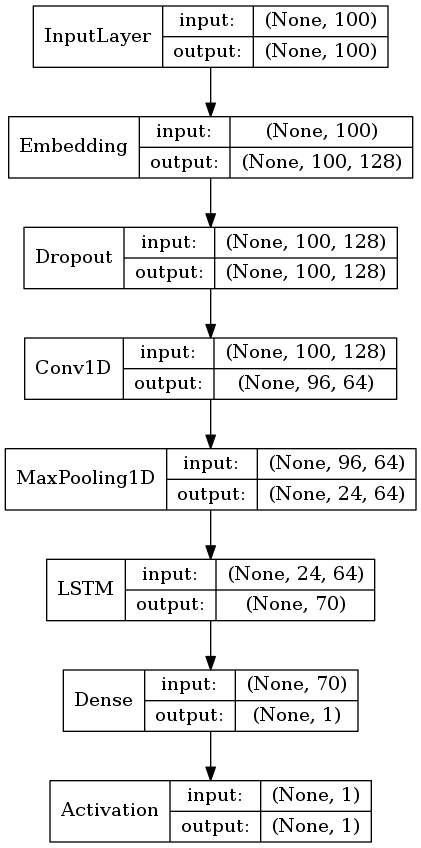

In [ ]:
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot
plot_model(model, to_file='model.png',show_shapes = True,show_layer_names=False)


In [ ]:
import numpy
from keras.datasets import imdb
from keras.preprocessing import sequence



# # load the dataset
# (X_train, y_train), (X_test, y_test) = imdb.load_data()
# X = numpy.concatenate((X_train, X_test), axis=0)
# y = numpy.concatenate((y_train, y_test), axis=0)

# -------------------------------
# PARAMETERS
# -------------------------------
top_words = 5000
max_words = 500
batch_size = 128
num_epochs = 2


CNN = True
# -------------------------------

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
print(X_train)
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# -------------------------------
#print(X_train)

[1, 778, 128, 74, 12, 630, 163, 15, 4, 1766, 2, 1051, 2, 32, 85, 156, 45, 40, 148, 139, 121, 664, 665, 10, 10, 1361, 173, 4, 749, 2, 16, 3804, 8, 4, 226, 65, 12, 43, 127, 24, 2, 10, 10]
